In [1]:
## Set-up Environment
import os
import sys

# Set project root (assumes notebook is in 'notebooks/' and project is one level up)
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
os.chdir(project_root)

# Add root to Python path for absolute imports like `env.trading_env`
if project_root not in sys.path:
    sys.path.append(project_root)

print("📁 Notebook directory:", notebook_dir)
print("✅ Project root set to:", project_root)


📁 Notebook directory: /home/jovyan/work/notebooks
✅ Project root set to: /home/jovyan/work


In [2]:
## Check to ensure in the right directory
! pwd

/home/jovyan/work


In [3]:
## Upgrade pip
! pip install --upgrade pip

In [4]:
## Install dependencies
! pip install -r requirements.txt

In [5]:
## Run integration test script
#! pytest tests/integration/test_integration.py --maxfail=1 --disable-warnings -q

In [6]:
	
## Generate Training Data
! python data_gen/generate_data.py --tickers-file data_gen/tickers.txt --interval 5min --start 2023-01-01 --end 2023-08-31

Fetching NVDA from 2023-01-01 to 2023-08-31 (5 minute)...
Saved NVDA_5minute to data/NVDA_5minute.csv
Fetching NVDA from 2023-01-01 to 2023-08-31 (1 day)...
Saved NVDA_1day to data/NVDA_1day.csv
Fetching NVDA from 2023-01-01 to 2023-08-31 (1 week)...
Saved NVDA_1week to data/NVDA_1week.csv


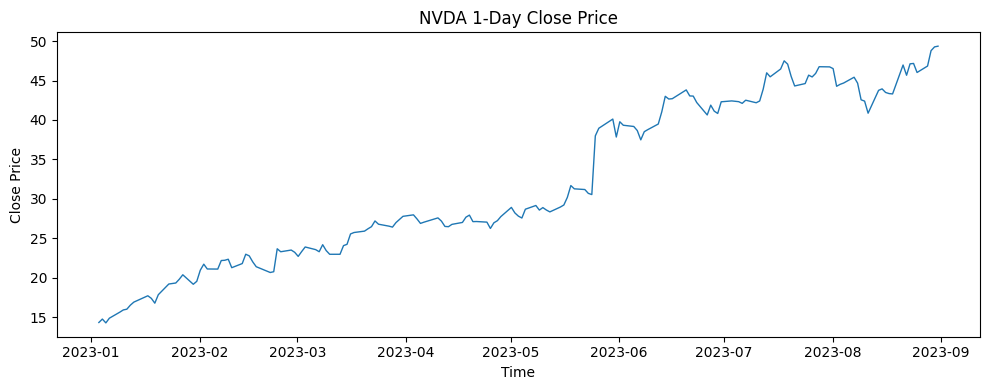

In [8]:
## ─── Plot all 1day CSVs in data/ ─────────────────────────────────────────
import glob
import pandas as pd
import matplotlib.pyplot as plt

# 1. Grab every CSV matching *_1day.csv
csv_files = glob.glob("data/*_1day.csv")
if not csv_files:
    raise FileNotFoundError("No files found: data/*_1day.csv")

# 2. Loop and plot
for file_path in sorted(csv_files):
    # Load and parse time
    df = pd.read_csv(file_path, parse_dates=[0])
    df.set_index(df.columns[0], inplace=True)

    # Extract ticker from filename
    ticker = file_path.split("/")[-1].split("_")[0]

    # Create the figure
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df["close"], linewidth=1)
    plt.title(f"{ticker} 1-Day Close Price")
    plt.xlabel("Time")
    plt.ylabel("Close Price")
    plt.tight_layout()
    plt.show()

In [9]:
## Install Shimmy for simulating trading environments
! pip install shimmy


In [9]:
## Run Integration Test for PPO
#%run train/train_ppo.py --test


In [19]:
# Run PPO training using files in `data/` directory
%run train/train_ppo.py

[Train] Using test_NVDA_5minute.csv for test
Using cpu device


/usr/local/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


[Callback] Rollout finished at step 2048, Avg Reward: 0.0000, Max Reward: 0.0000
-----------------------------
| time/              |      |
|    fps             | 521  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
[Callback] Rollout finished at step 4096, Avg Reward: 0.0000, Max Reward: 0.0000
-------------------------------------------
| time/                   |               |
|    fps                  | 613           |
|    iterations           | 2             |
|    time_elapsed         | 6             |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 1.1941767e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0131       |
|    explained_variance   | -0.147        |
|    learning_rate        | 0.0003        |
|    loss                 | 1.47e+11      |
|    n_updat

KeyboardInterrupt: 

In [16]:
! ls ../debug_rewards.log


ls: cannot access '../debug_rewards.log': No such file or directory
